In [83]:
# Import Required Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [81]:
# Import Diabetes Dataset
df = pd.read_csv('diabetes.csv')

In [82]:
# Printing the DataFrame
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
# Description of the data in Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
# Printing infromation about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
# Checking for NULL values
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [34]:
# Checking for total number of NULL values for each column
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

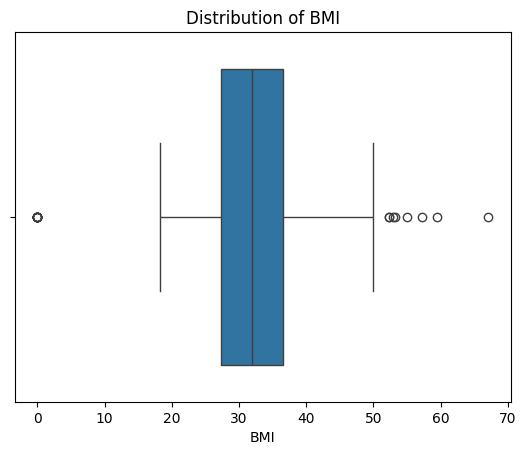

In [35]:
sns.boxplot(x='BMI', data=df)
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

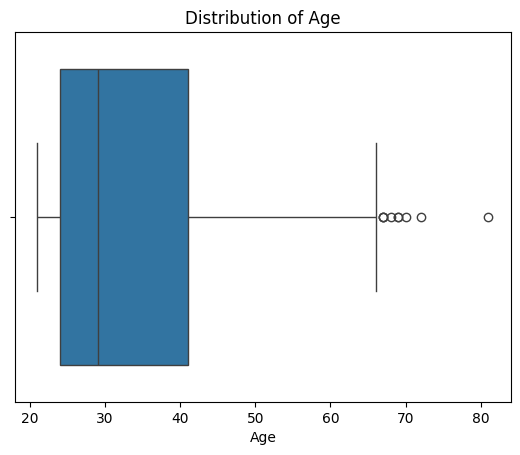

In [36]:
sns.boxplot(x='Age', data=df)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

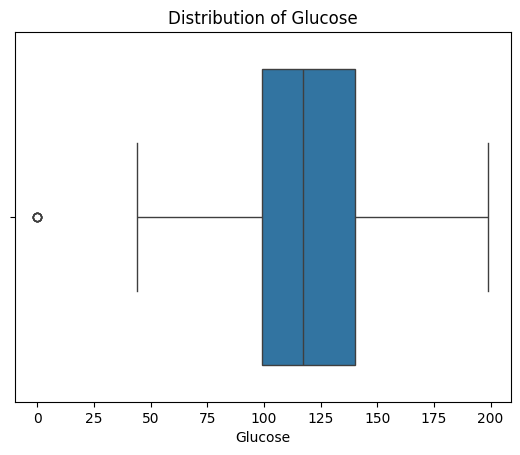

In [37]:
sns.boxplot(x='Glucose', data=df)
plt.xlabel('Glucose')
plt.title('Distribution of Glucose')
plt.show()

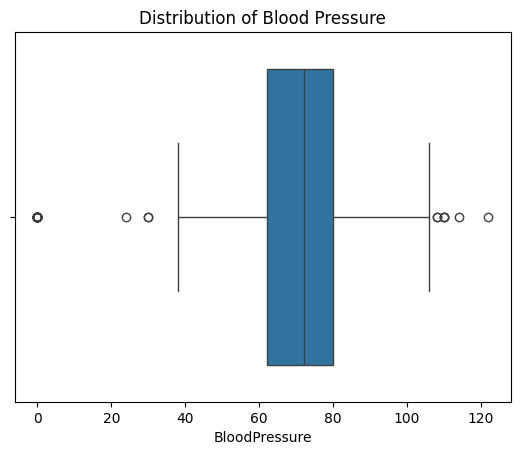

In [38]:
sns.boxplot(x='BloodPressure', data=df)
plt.xlabel('BloodPressure')
plt.title('Distribution of Blood Pressure')
plt.show()

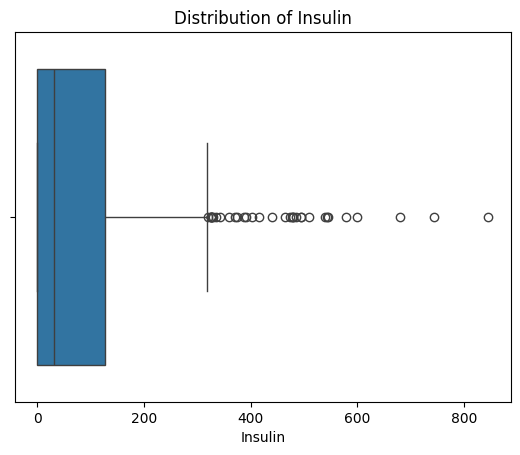

In [39]:
sns.boxplot(x='Insulin', data=df)
plt.xlabel('Insulin')
plt.title('Distribution of Insulin')
plt.show()

In [40]:
# Outliers Handling
q1 = df["BMI"].quantile(0.25)
q3 = df["BMI"].quantile(0.75)
iqr = q3 - q1

# define the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# remove outliers from the dataset
df2 = df[df['BMI'] < upper_bound]
df2 = df2[df2['BMI'] > lower_bound]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
# Outliers Handling
q1 = df["BMI"].quantile(0.25)
q3 = df["BMI"].quantile(0.75)
iqr = q3 - q1

# define the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# remove outliers from the dataset
df2 = df[df['BMI'] < upper_bound]
df2 = df2[df2['BMI'] > lower_bound]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


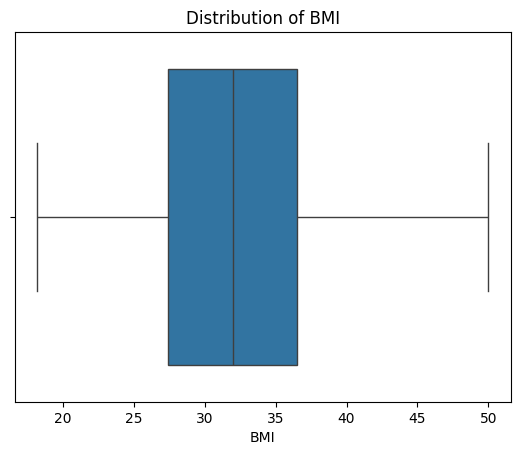

In [42]:
# Boxplots after outliers Removal with very few outlier values
sns.boxplot(x='BMI', data=df2)
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

In [43]:
# Outliers Handling
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1

# define the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# remove outliers from the dataset
df2 = df2[df2['Age'] < upper_bound]
df2 = df2[df2['Age'] > lower_bound]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


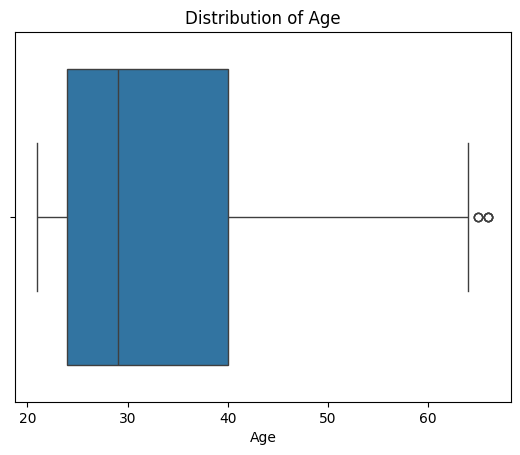

In [44]:
sns.boxplot(x='Age', data=df2)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

In [45]:
# Outliers Handling
q1 = df["BloodPressure"].quantile(0.25)
q3 = df["BloodPressure"].quantile(0.75)
iqr = q3 - q1

# define the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# remove outliers from the dataset
df2 = df2[df2['BloodPressure'] < upper_bound]
df2 = df2[df2['BloodPressure'] > lower_bound]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


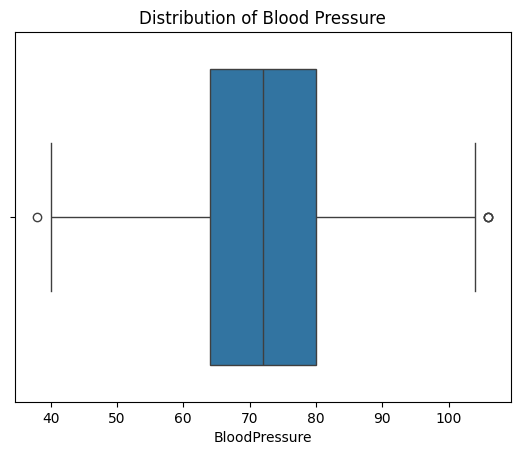

In [46]:
sns.boxplot(x='BloodPressure', data=df2)
plt.xlabel('BloodPressure')
plt.title('Distribution of Blood Pressure')
plt.show()

In [47]:
# Outliers Handling
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)
iqr = q3 - q1

# define the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# remove outliers from the dataset
df2 = df2[df2['Insulin'] < upper_bound]
df2 = df2[df2['Insulin'] > lower_bound]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


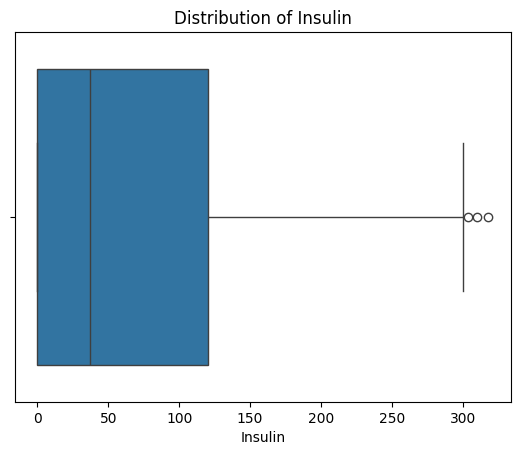

In [48]:
sns.boxplot(x='Insulin', data=df2)
plt.xlabel('Insulin')
plt.title('Distribution of Insulin')
plt.show()

In [49]:
convert = {'Pregnancies' : int, 'Glucose' : int, 'BloodPressure' : int, 'SkinThickness' : int, 'Insulin' : int, 'Age' : int}
df2 = df2.astype(convert)
df2.dtypes

Pregnancies                   int32
Glucose                       int32
BloodPressure                 int32
SkinThickness                 int32
Insulin                       int32
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int32
Outcome                       int64
dtype: object

In [50]:
# Checking for NULL values
df2.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
new_df = df2

In [52]:
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


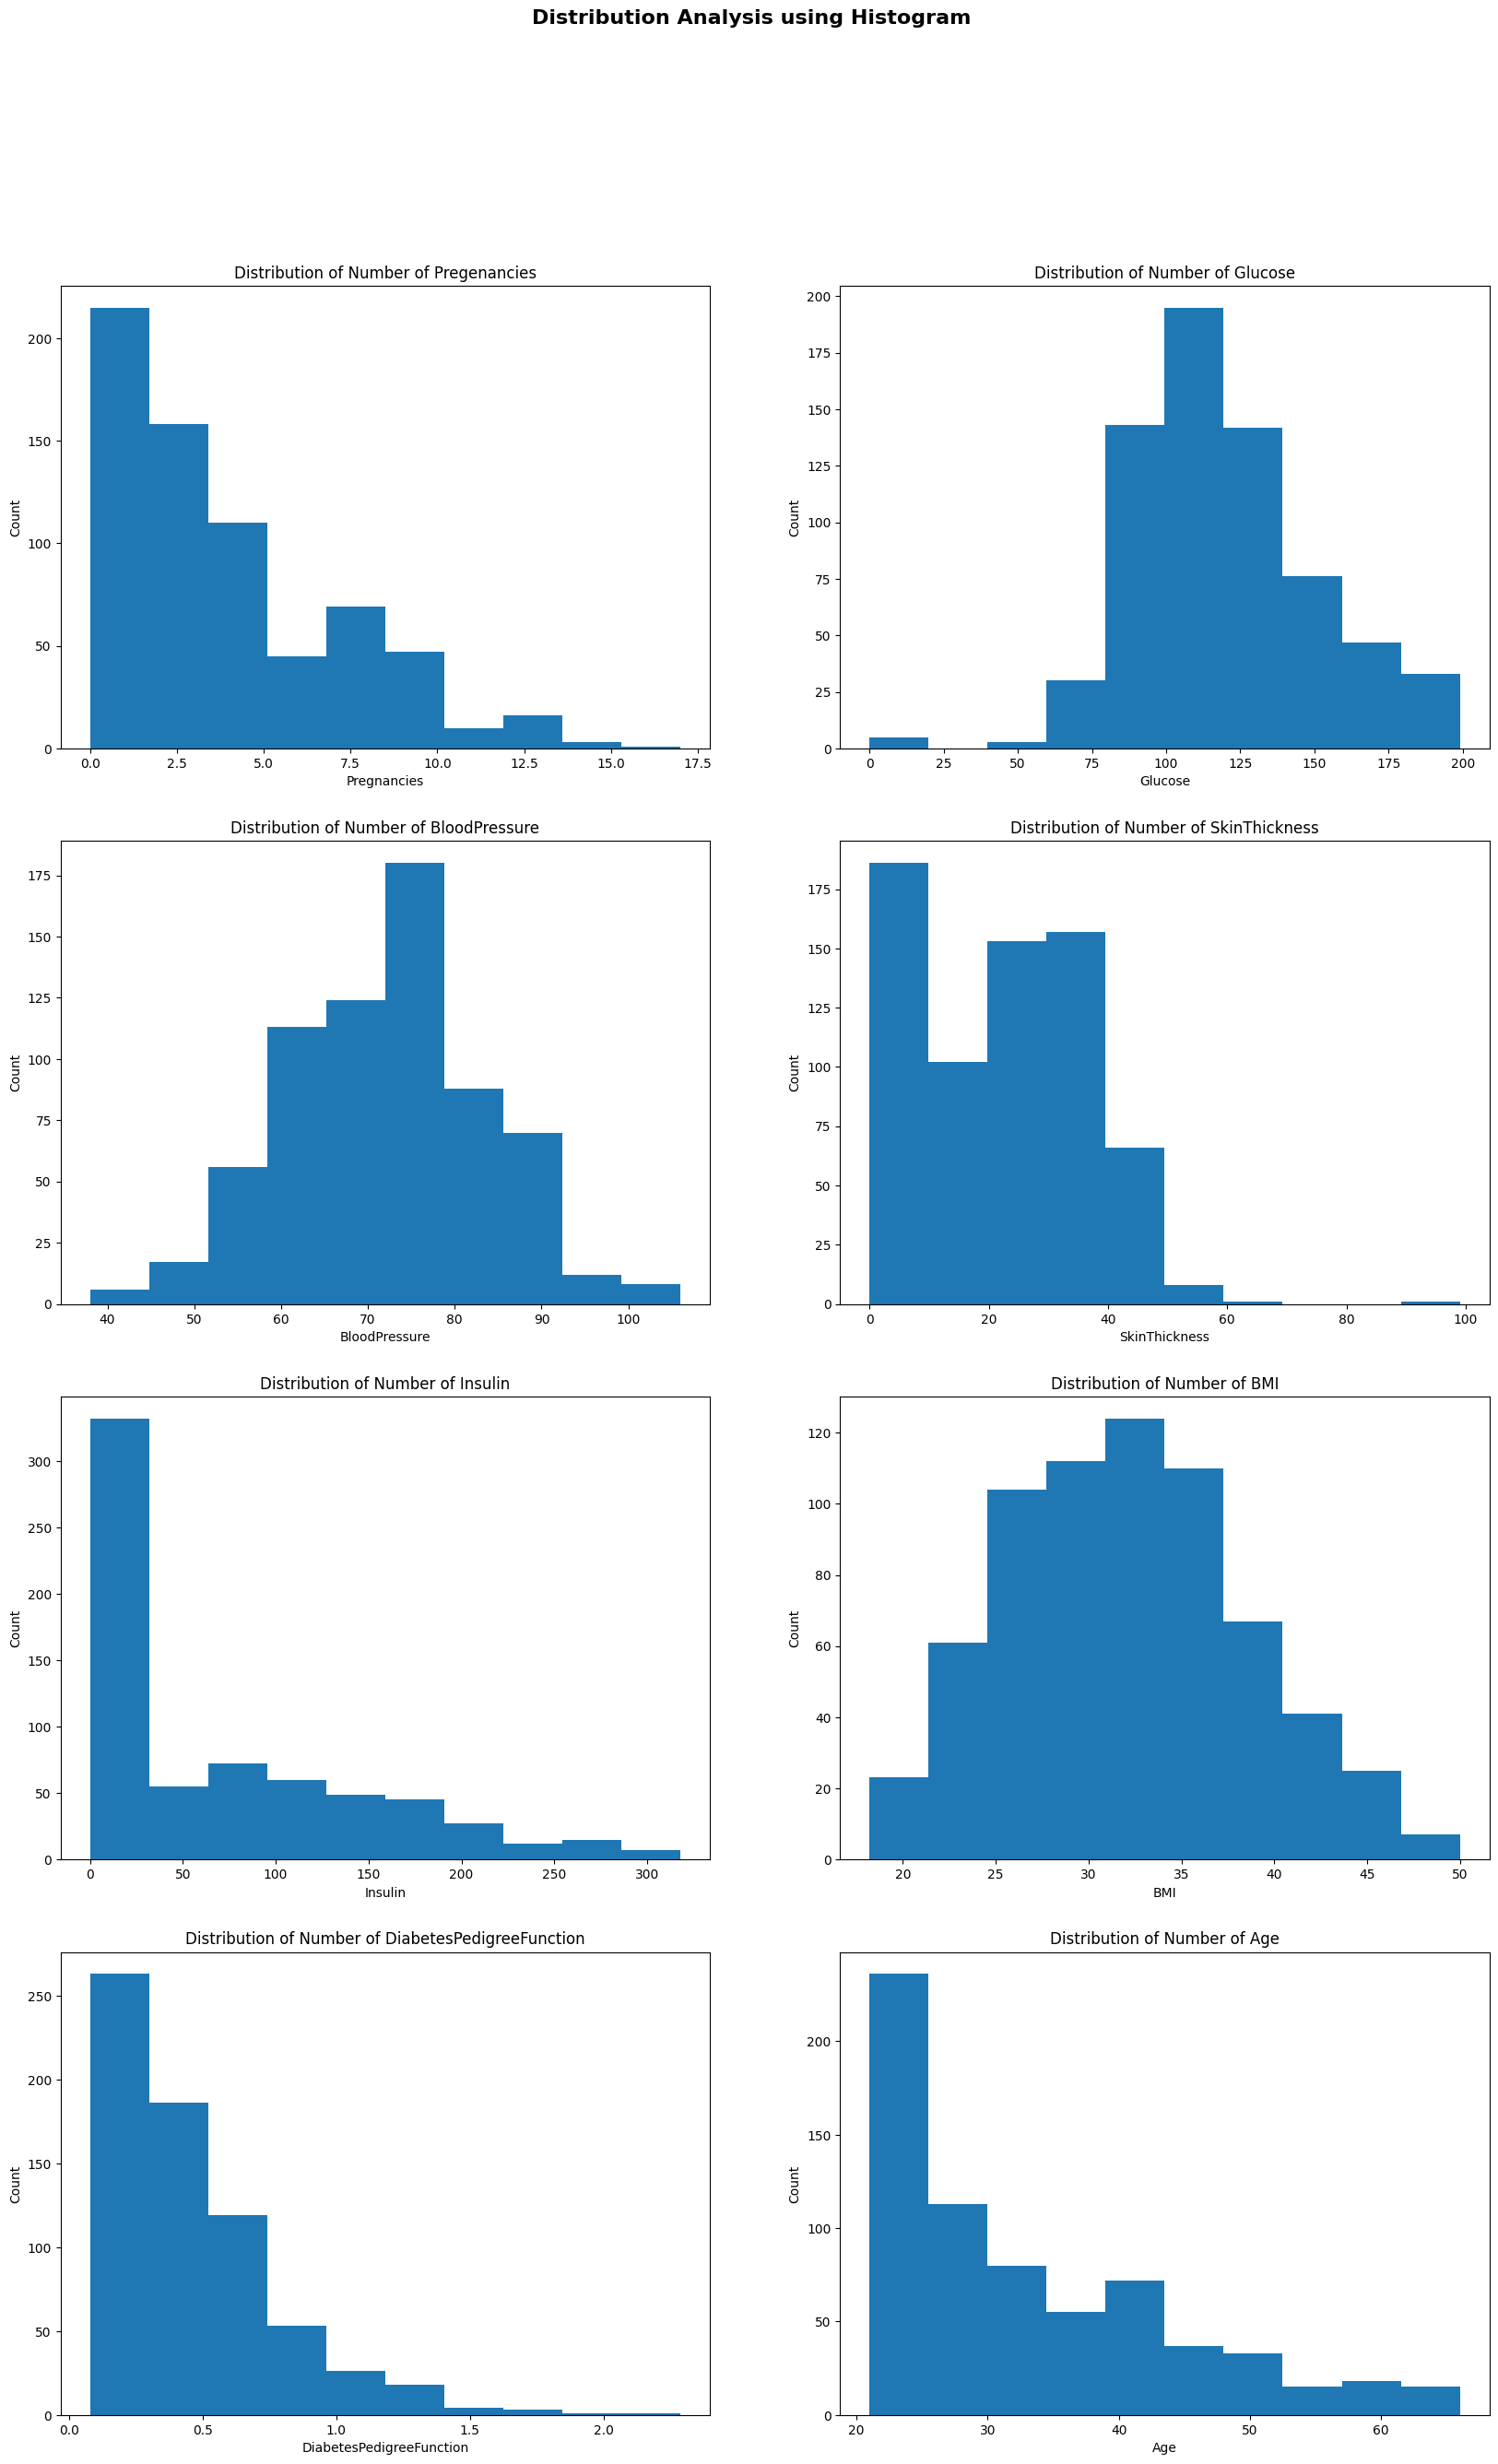

In [53]:
# Distribution Analysis using Histogram
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))
ax1.hist(new_df['Pregnancies'])
ax2.hist(new_df['Glucose'])
ax3.hist(new_df['BloodPressure'])
ax4.hist(new_df['SkinThickness'])
ax5.hist(new_df['Insulin'])
ax6.hist(new_df['BMI'])
ax7.hist(new_df['DiabetesPedigreeFunction'])
ax8.hist(new_df['Age'])
fig.suptitle("Distribution Analysis using Histogram", fontsize=16, fontweight='bold')
ax1.set(title="Distribution of Number of Pregenancies",
        xlabel="Pregnancies",
        ylabel="Count")
ax2.set(title="Distribution of Number of Glucose",
        xlabel="Glucose",
        ylabel="Count")
ax3.set(title="Distribution of Number of BloodPressure",
        xlabel="BloodPressure",
        ylabel="Count")
ax4.set(title="Distribution of Number of SkinThickness",
        xlabel="SkinThickness",
        ylabel="Count")
ax5.set(title="Distribution of Number of Insulin",
        xlabel="Insulin",
        ylabel="Count")
ax6.set(title="Distribution of Number of BMI",
        xlabel="BMI",
        ylabel="Count")
ax7.set(title="Distribution of Number of DiabetesPedigreeFunction",
        xlabel="DiabetesPedigreeFunction",
        ylabel="Count")
ax8.set(title="Distribution of Number of Age",
        xlabel="Age",
        ylabel="Count");

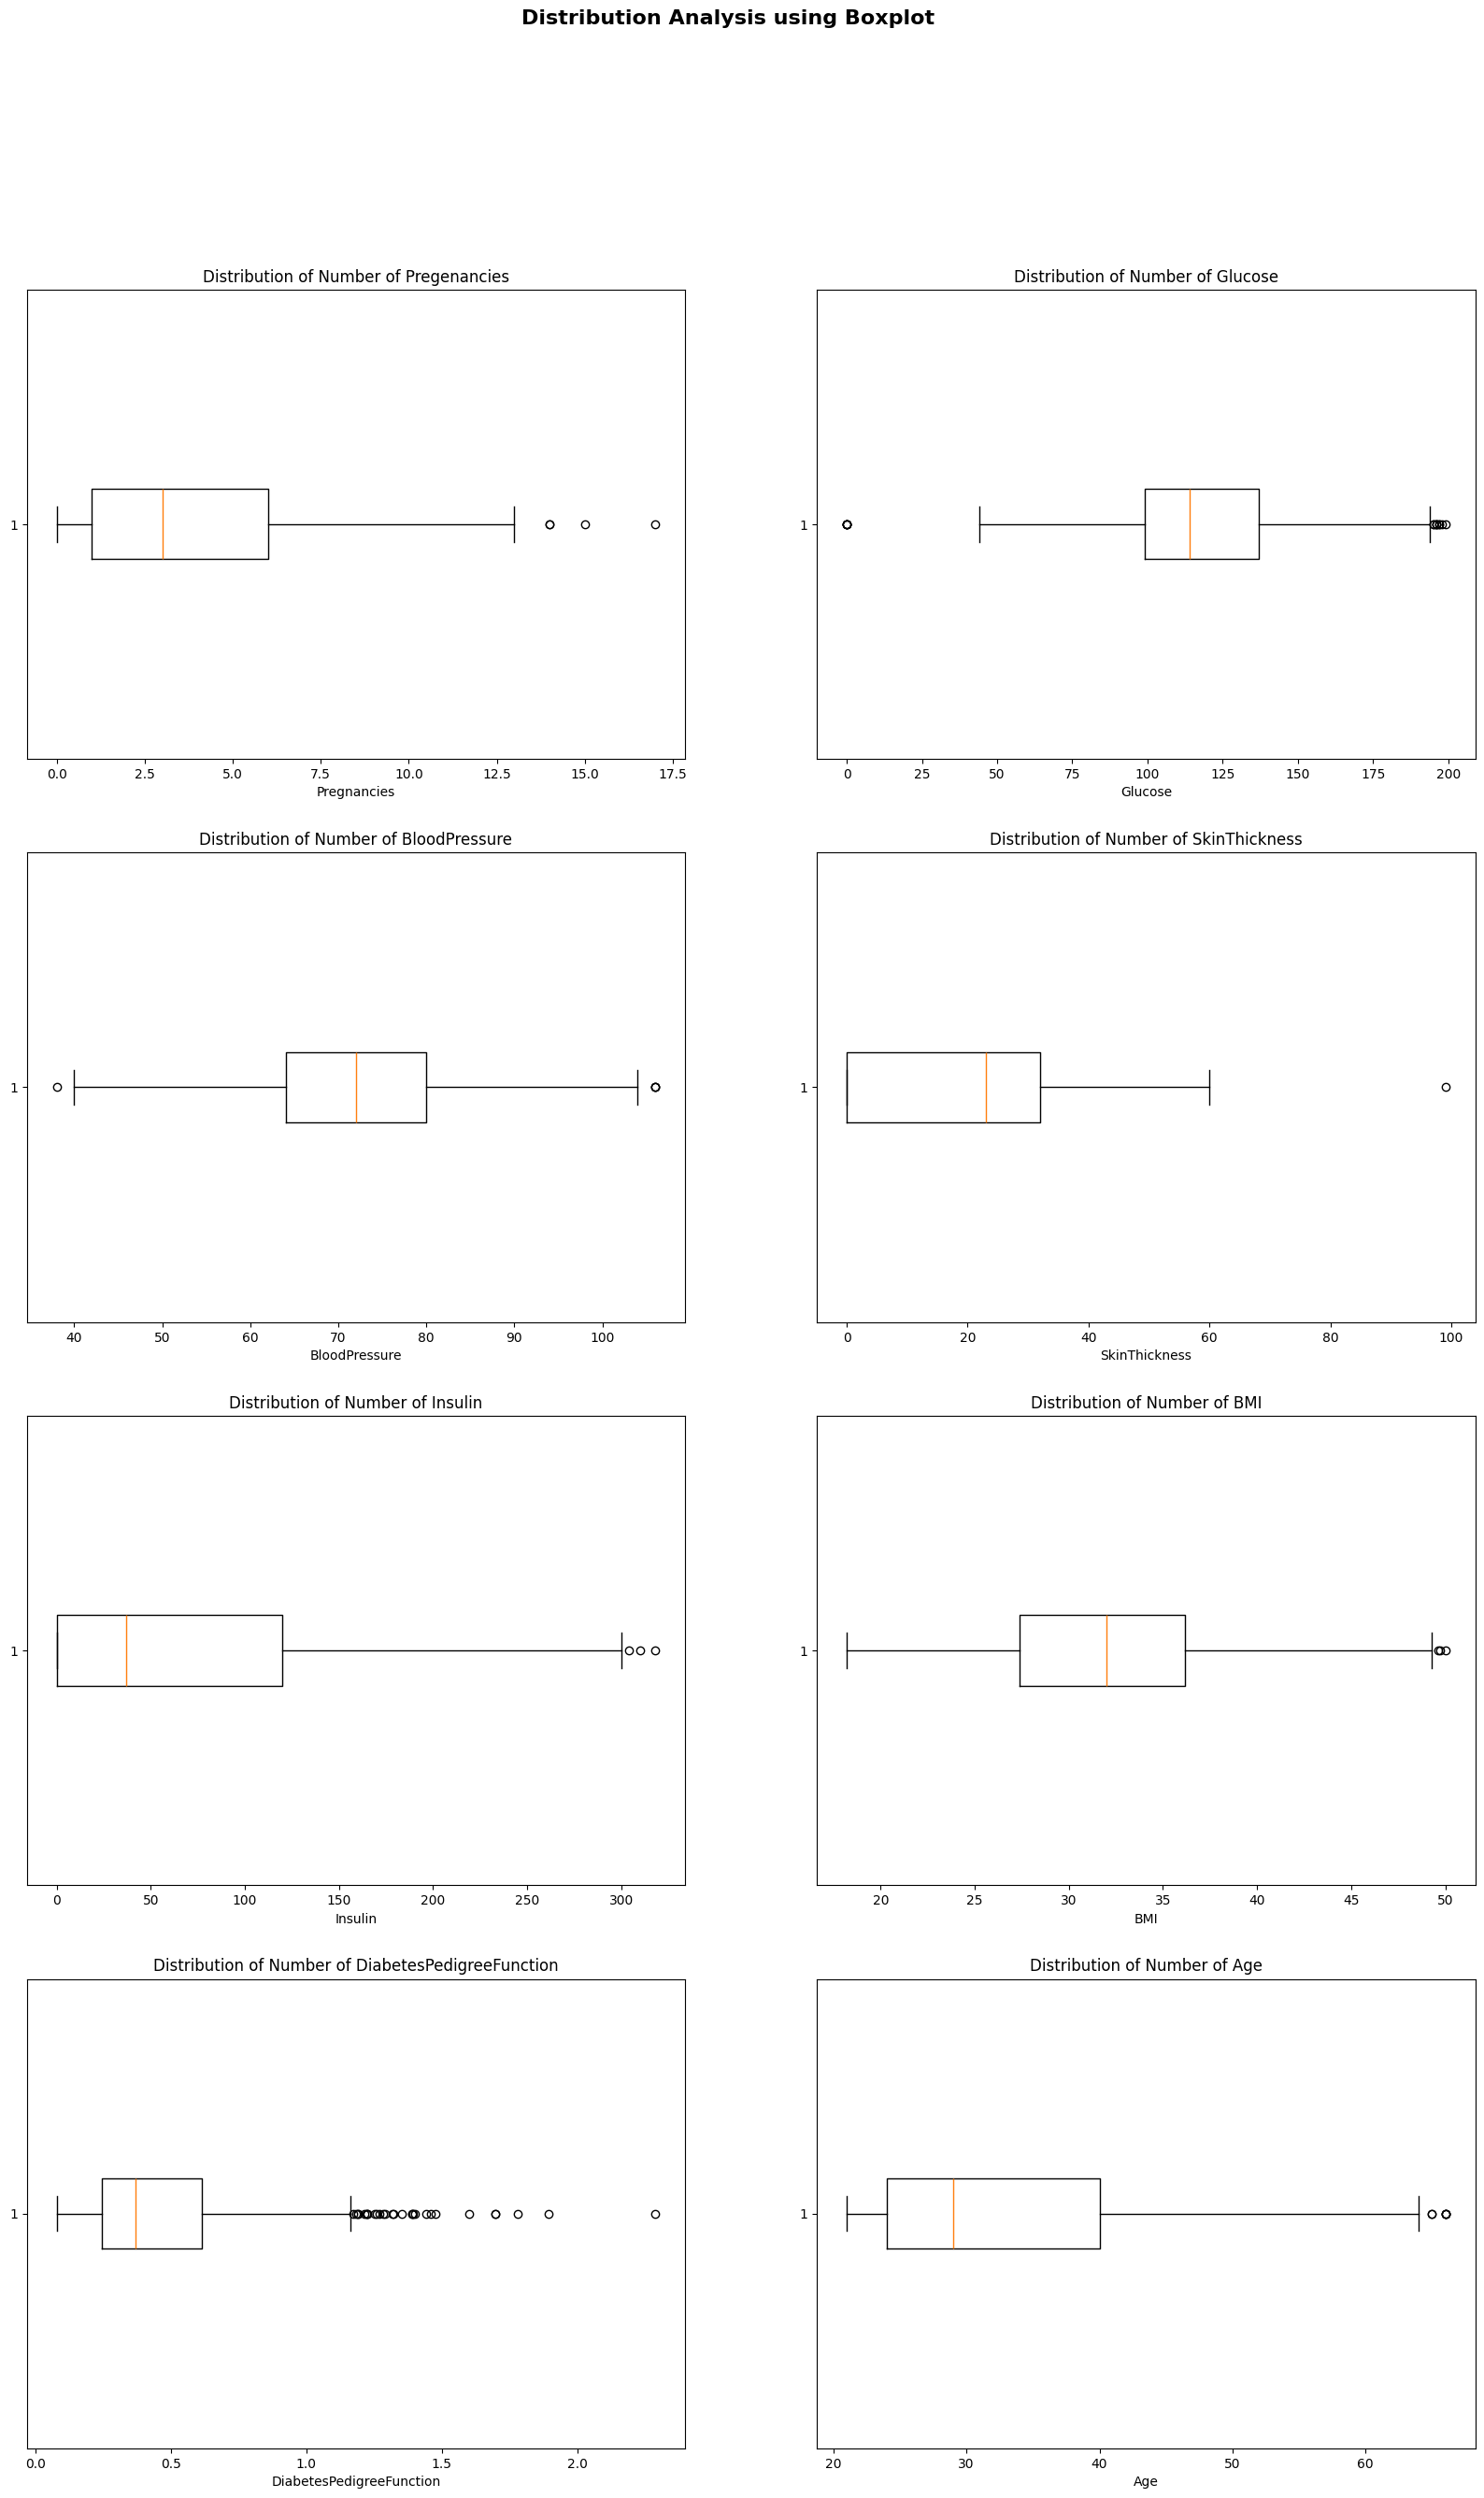

In [54]:
# Distribution Analysis using Boxplot
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))
ax1.boxplot(new_df['Pregnancies'], vert=False)
ax2.boxplot(new_df['Glucose'], vert=False)
ax3.boxplot(new_df['BloodPressure'], vert=False)
ax4.boxplot(new_df['SkinThickness'], vert=False)
ax5.boxplot(new_df['Insulin'], vert=False)
ax6.boxplot(new_df['BMI'], vert=False)
ax7.boxplot(new_df['DiabetesPedigreeFunction'], vert=False)
ax8.boxplot(new_df['Age'], vert=False)
fig.suptitle("Distribution Analysis using Boxplot", fontsize=16, fontweight='bold')
ax1.set(title="Distribution of Number of Pregenancies",
        xlabel="Pregnancies")
ax2.set(title="Distribution of Number of Glucose",
        xlabel="Glucose")
ax3.set(title="Distribution of Number of BloodPressure",
        xlabel="BloodPressure")
ax4.set(title="Distribution of Number of SkinThickness",
        xlabel="SkinThickness")
ax5.set(title="Distribution of Number of Insulin",
        xlabel="Insulin")
ax6.set(title="Distribution of Number of BMI",
        xlabel="BMI")
ax7.set(title="Distribution of Number of DiabetesPedigreeFunction",
        xlabel="DiabetesPedigreeFunction")
ax8.set(title="Distribution of Number of Age",
        xlabel="Age");

In [ ]:
# Outcome Dependency Analysis on Glucose and Insulin Levels
plt.style.use('seaborn-whitegrid')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
scatter = ax1.scatter(x=new_df["Age"],
            y=new_df["Glucose"],
            c=new_df["Outcome"],
            cmap='winter')
ax2.scatter(x=new_df["Age"],
            y=new_df["Insulin"],
            c=new_df["Outcome"],
            cmap='winter')
ax3.scatter(x=new_df["BMI"],
            y=new_df["Glucose"],
            c=new_df["Outcome"],
            cmap='winter')
ax4.scatter(x=new_df["BMI"],
            y=new_df["Insulin"],
            c=new_df["Outcome"],
            cmap='winter')

fig.suptitle("Diabetes Analysis", fontsize=16, fontweight='bold')

ax1.legend(*scatter.legend_elements(), title="Result")
ax1.axhline(new_df["Glucose"].mean(), linestyle="--")
ax1.set(title="Age vs Glucose Level",
        xlabel="Age",
        ylabel="Glucose")

ax2.legend(*scatter.legend_elements(), title="Result")
ax2.axhline(new_df["Insulin"].mean(), linestyle="--")
ax2.set(title="Age vs Insulin Level",
        xlabel="Age",
        ylabel="Insulin")

ax3.legend(*scatter.legend_elements(), title="Result")
ax3.axhline(new_df["Glucose"].mean(), linestyle="--")
ax3.set(title="BMI vs Glucose",
        xlabel="BMI",
        ylabel="Glucose")

ax4.legend(*scatter.legend_elements(), title="Result")
ax4.axhline(new_df["Insulin"].mean(), linestyle="--")
ax4.set(title="BMI vs Insulin",
        xlabel="BMI",
        ylabel="Insulin");

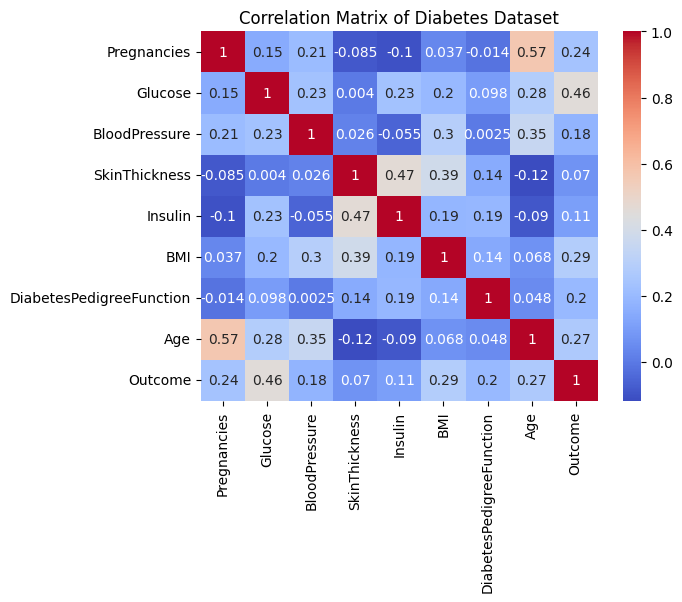

In [55]:
# Heatmap for correlation matrix
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()


As the Correlation Co-efficients of Insulin and SkinThickness are very close to 0. Thus, the heatmap suggest that the Outcome of classification do not depend on Insulin and SkinThickness values.

In [56]:
df2.drop(["Insulin", "SkinThickness"], axis=1, inplace = True)
df2

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


In [59]:
# Scaling the Data
df_scaled = df2.drop("Outcome", axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age'])
df_scaled['Outcome'] = df2['Outcome']

In [58]:
(df_scaled)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639884,0.930059,-0.005212,0.234429,0.508380,1.540334,1.0
1,-0.847295,-1.082999,-0.532140,-0.855368,-0.366094,-0.168835,0.0
2,1.234756,2.048425,-0.707783,-1.369130,0.650957,-0.078879,1.0
3,-0.847295,-0.955186,-0.532140,-0.621840,-0.949077,-1.068398,0.0
4,-1.144731,0.578573,-2.815494,1.713439,5.771067,0.011078,1.0
...,...,...,...,...,...,...,...
669,1.829628,-0.571746,0.346073,0.125449,-0.936403,2.709766,0.0
670,-0.549859,0.099273,-0.180855,0.732622,-0.400946,-0.528660,0.0
671,0.342448,0.067320,-0.005212,-0.917643,-0.701943,-0.258791,0.0
672,-0.847295,0.227087,-1.059068,-0.310470,-0.372431,1.270466,0.0


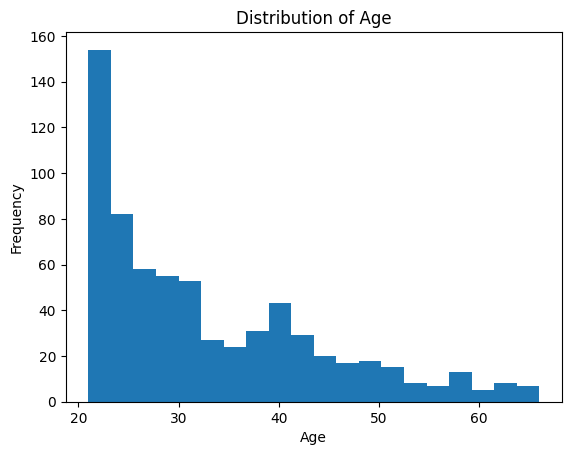

In [60]:
plt.hist(df2['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

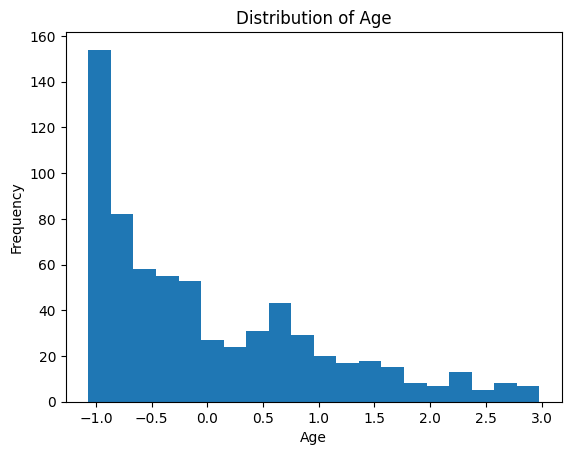

In [61]:
plt.hist(df_scaled['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

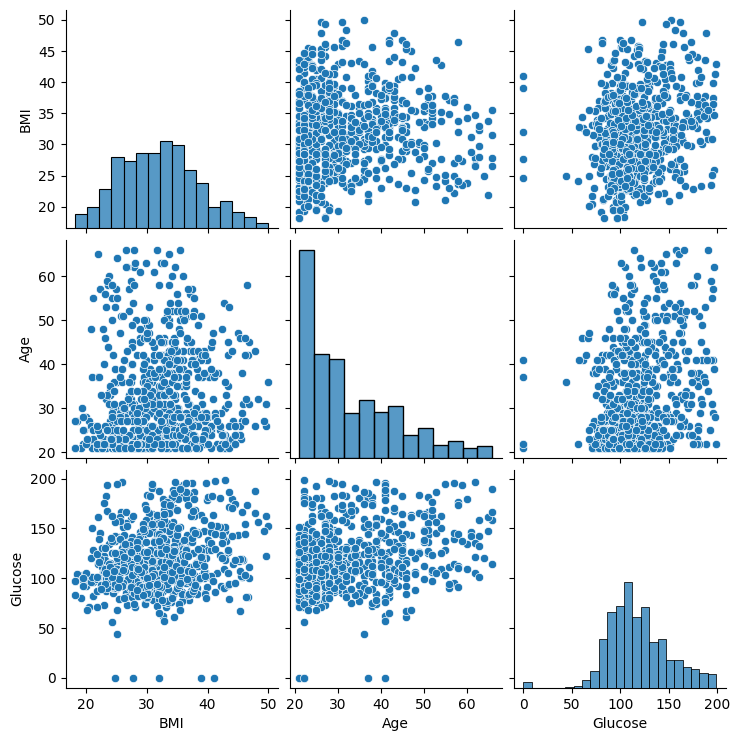

In [62]:
sns.pairplot(data=df2[['BMI', 'Age', 'Glucose']])
plt.show()


In [64]:
# split the data into features (X) and target (y)
X = new_df.drop('Outcome', axis=1)
y = new_df['Outcome']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# create a decision tree classifier with a maximum depth of 3
clf = DecisionTreeClassifier(max_depth=4)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))


Accuracy: 77.78%


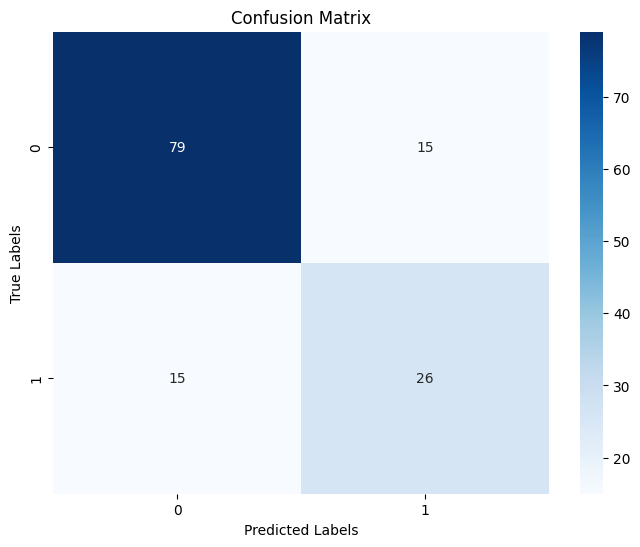

In [65]:
# Assuming you have your true labels y_true and predicted labels y_pred

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [66]:

# Assuming you have your true labels y_true and predicted labels y_pred

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print the precision
print("Precision:", precision)


Precision: 0.6341463414634146


In [67]:


# Assuming you have your true labels y_true and predicted labels y_pred

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the recall
print("Recall:", recall)


Recall: 0.6341463414634146


In [68]:

# split the data into features (X) and target (y)
X = new_df.drop('Outcome', axis=1)
y = new_df['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Creating a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the classifier
gnb.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = gnb.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7555555555555555


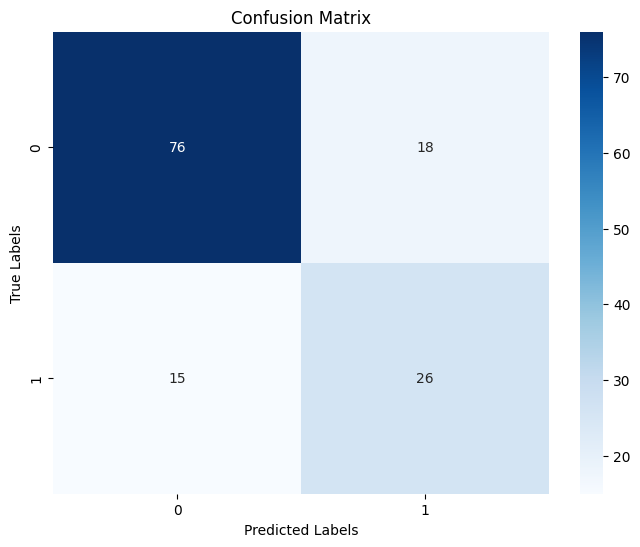

In [70]:
# Assuming you have your true labels y_true and predicted labels y_pred

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [69]:
# Assuming you have your true labels y_true and predicted labels y_pred

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print the precision
print("Precision:", precision)

Precision: 0.5909090909090909


In [71]:

# Assuming you have your true labels y_true and predicted labels y_pred

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the recall
print("Recall:", recall)

Recall: 0.6341463414634146


In [72]:
# Assuming you have your features X and labels y ready

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Creating a Logistic Regression classifier
logreg = LogisticRegression()

# Training the classifier
logreg.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = logreg.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7703703703703704


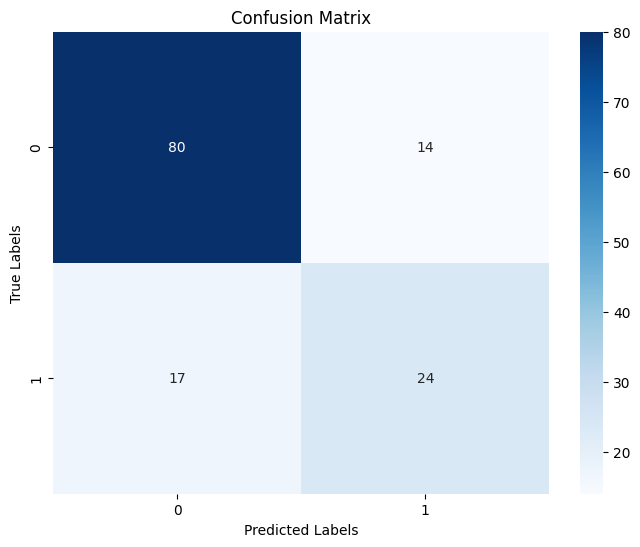

In [73]:
# Assuming you have your true labels y_true and predicted labels y_pred

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [74]:
# Assuming you have your true labels y_true and predicted labels y_pred

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print the precision
print("Precision:", precision)

Precision: 0.631578947368421


In [75]:

# Assuming you have your true labels y_true and predicted labels y_pred

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the recall
print("Recall:", recall)

Recall: 0.5853658536585366


In [76]:


# Assuming you have your features X and labels y ready

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators = 500)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7777777777777778


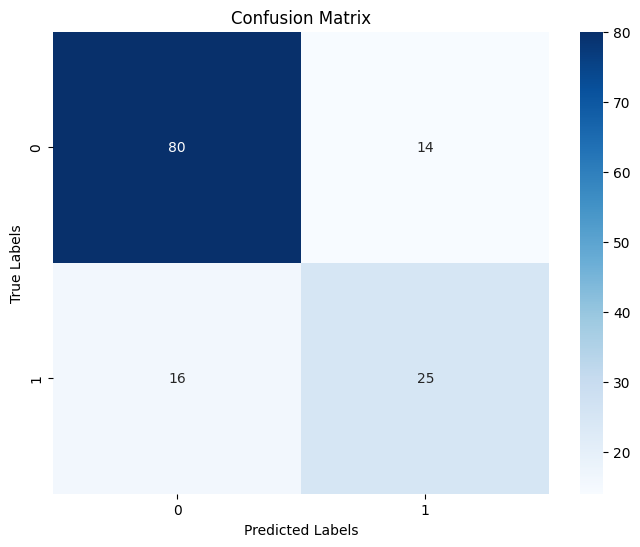

In [77]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [78]:
# Calculate precision
precision = precision_score(y_test, y_pred)

# Print the precision
print("Precision:", precision)

Precision: 0.6410256410256411


In [79]:
# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the recall
print("Recall:", recall)

Recall: 0.6097560975609756
